In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def part1(folding_line, paper):
    y, x = folding_line
    if y > 0:
        first_fold = np.logical_or(paper[:y, :], np.flipud(paper[y+1:, :]))
    if x > 0:
        first_fold = np.logical_or(paper[:, :x], np.fliplr(paper[:, x+1:]))
    count = np.count_nonzero(first_fold)
    print(f"There are {count} dots visible after the first folding.")

def part2(folding_lines, paper):
    for y, x in folding_lines:
        if y > 0:
            paper = np.logical_or(paper[:y, :], np.flipud(paper[y+1:, :]))
        if x > 0:
            paper = np.logical_or(paper[:, :x], np.fliplr(paper[:, x+1:]))
    plt.figure()
    plt.imshow(paper)
    plt.show()

filename = "./data/day13a.txt"
with open(filename, 'r') as ff:
    data = ff.read().strip().split('\n')

ind = data.index('') # blank line in the input

rows = []
cols = []
for pair in data[:ind]:
    a, b = pair.split(',')
    rows.append(int(b))
    cols.append(int(a))

folding_lines =  []

for sentence in data[ind+1:]:
    donde = sentence.split(" ")[-1]
    rc, n = donde.split("=")
    if rc == "y":
        donde_ind = (int(n), 0)
    elif rc == "x":
        donde_ind = (0, int(n))
    folding_lines.append(donde_ind)
folding_lines = np.array(folding_lines)

# Create paper:
sizey = folding_lines[np.where(folding_lines[:,1]==0)[0][0]][0] # First appearance of a zero at x
sizex = folding_lines[np.where(folding_lines[:,0]==0)[0][0]][1] # First appearance of a zero at y
paper = np.zeros((2*sizey+1, 2*sizex+1), dtype=bool)
paper[rows, cols] = True

In [2]:
part1(folding_lines[0], paper)


There are 693 dots visible after the first folding.


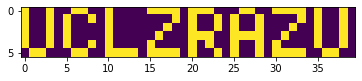

In [3]:
part2(folding_lines, paper)